In [33]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels as sms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

<h1>Exercise 1

In [34]:
#Importing dataset to solve exercise 1
### This dataset has GDP growth vs. investment in education for a specific country, in a 15 year timeframe
dframe_ex1 = pd.read_excel('Regression_exercises_datasets.xlsx', sheet_name='ex.1')

In [35]:
dframe_ex1

,Ano,TxCrescPIB,InvestEduc
0,1,-1.5,7
1,2,-0.9,9
2,3,1.3,15
3,4,0.8,12
4,5,0.3,10
5,6,2.0,15
6,7,4.0,20
7,8,3.7,17
8,9,0.2,8
9,10,-2.0,5


In [36]:
dframe_ex1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ano         15 non-null     int64  
 1   TxCrescPIB  15 non-null     float64
 2   InvestEduc  15 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 488.0 bytes


In [37]:
dframe_ex1.describe()

,Ano,TxCrescPIB,InvestEduc
count,15.000000,15.000000,15.000000
mean,8.000000,1.280000,13.266667
std,4.472136,1.897065,4.712698
min,1.000000,-2.000000,5.000000
25%,4.500000,0.250000,9.500000
50%,8.000000,1.100000,13.000000
75%,11.500000,2.600000,17.000000
max,15.000000,4.000000,20.000000


Text(0.5, 1.0, 'Correlation Heatmap - All Variables')

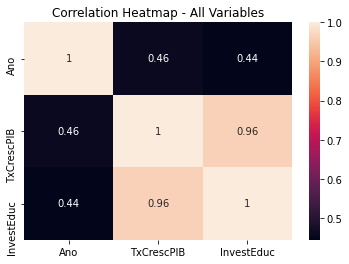

In [38]:
#Let's plot a correlation heatmap between two variables
sns.heatmap(dframe_ex1.corr(), annot=True)
plt.title('Correlation Heatmap - All Variables')

Hmmm, correlation between investment in education and GDP growth it's almost 1!

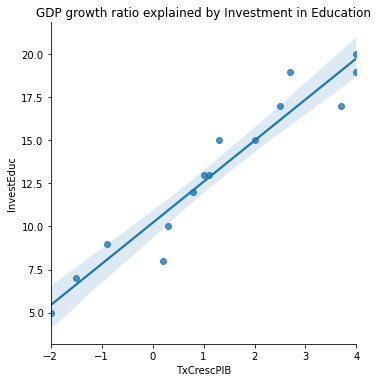

In [39]:
#Let's plot a scatterplot now...
sns.lmplot(x='TxCrescPIB', y='InvestEduc', data=dframe_ex1);
plt.title('GDP growth ratio explained by Investment in Education');

Great! Sure there is a linar relation between both of variables and we can now start to build a Linear Regression Model!

In [40]:
X = np.array(dframe_ex1['InvestEduc'])
y = dframe_ex1['TxCrescPIB']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             TxCrescPIB   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     160.4
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.09e-08
Time:                        00:04:27   Log-Likelihood:                -10.943
No. Observations:                  15   AIC:                             25.89
Df Residuals:                      13   BIC:                             27.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.8563      0.429     -8.993      0.0

C:\Users\ivanr\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<h1>Ex. 1) Answering some questions...

Equation for the model would be:<br>
<br> ${GDP} = {-3.8563} + {0.3872} * {InvEduc} $

92.50% of the GDP variation is explained by Investment in Education, for this country, using this dataset.

The Investment in Education is statistically significant in explaining GDP at 5% significance because ${pvalue}<=0.05$

If we perform the calculation $\frac{const}{coef.InvEduc}$ we can find the Investment in Education that result in a ${GDP}=0$ <br><br>
$\frac{3.8563}{0.3872}=9,9595$

If Investment in Education equals zero, than we expect intercept, or  ${GDP}={-3.8563}$

If Investment in education equals to USD 11 bi, we just need to replace values in our model...<br><br>
${GDP} = {-3.8563} + {0.3872} * {11} $<br>
${GDP} =  0.4029$<br>

<h1>Exercise 2

In [41]:
#Importing dataset to solve exercise 2
### This dataset has corruption data for 52 contries
###### CPI - Corruption Perception Index
###### 'Idade' or Age - Mean age for the country billionaires 
###### 'Horas' or Hours - Work hours, on average. Total Hours worked in a Yer/ 52 weeks
dframe_ex2 = pd.read_excel('Regression_exercises_datasets.xlsx', sheet_name='Ex.2')

In [42]:
dframe_ex2.head(3)

,pais,cpi,idade,horas
0,Argentina,2.9,72,35.0
1,Australia,8.7,64,32.0
2,Austria,7.9,72,32.0


In [43]:
dframe_ex2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pais    52 non-null     object 
 1   cpi     52 non-null     float64
 2   idade   52 non-null     int64  
 3   horas   52 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.8+ KB


In [44]:
dframe_ex2.describe()

,cpi,idade,horas
count,52.000000,52.000000,52.000000
mean,5.563462,61.730769,32.788462
std,2.351639,8.724802,2.445376
min,2.000000,39.000000,26.800000
25%,3.500000,58.750000,31.275000
50%,5.300000,63.000000,32.950000
75%,7.825000,67.000000,34.500000
max,9.300000,79.000000,38.100000


Text(0.5, 1.0, 'Correlation Heatmap - All Variables')

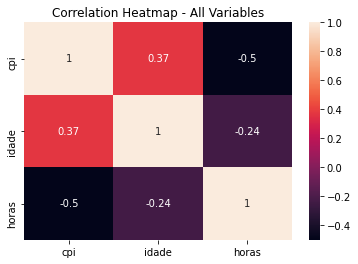

In [45]:
#Let's plot a correlation heatmap between two variables
sns.heatmap(dframe_ex2.corr(), annot=True)
plt.title('Correlation Heatmap - All Variables')

There are no strong correlations... Maybe cpi vs. hours, but it is not so strong...

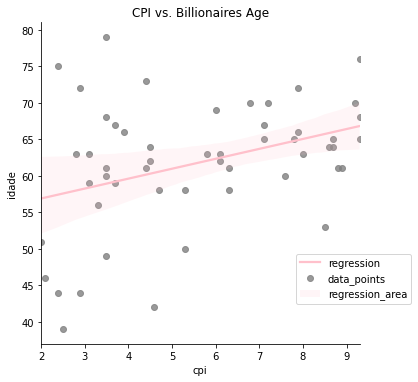

In [46]:
#Let's plot a scatterplot now... CPI vs. Billionaires Age
sns.lmplot(x='cpi', y='idade', data=dframe_ex2, scatter_kws={'color': 'gray'}, line_kws={'color':'pink'});
plt.title('CPI vs. Billionaires Age');
plt.legend(['regression','data_points','regression_area'], loc=[0.8,0.125])

Many datapoints are outside the regression area (min, max)... POSITIVE correlation

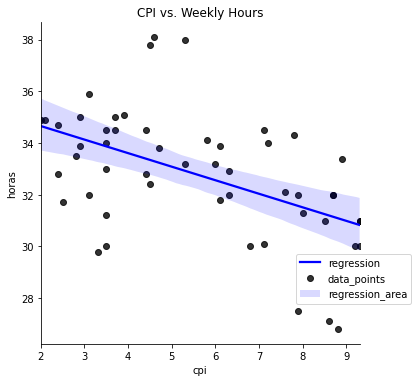

In [47]:
#Let's plot a scatterplot now... CPI vs. Av. Worked Hours
sns.lmplot(x='cpi', y='horas', data=dframe_ex2, scatter_kws={'color': 'black'}, line_kws={'color':'blue'});
plt.title('CPI vs. Weekly Hours');
plt.legend(['regression','data_points','regression_area'], loc=[0.8,0.125])

Many datapoints are outside the regression area (min, max)... NEGATIVE correlation

The exercise asks us to fit the following equation into the data <BR><BR>
${cpi}_{i} = {a}+{b}_{1}*{age}+{b}_{2}*{hours}+{u}_{i}$

In [58]:
#Let's start the regression model
X = np.column_stack((dframe_ex2['idade'], dframe_ex2['horas']))
y = dframe_ex2['cpi']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     11.41
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           8.55e-05
Time:                        00:05:45   Log-Likelihood:                -107.81
No. Observations:                  52   AIC:                             221.6
Df Residuals:                      49   BIC:                             227.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1589      4.754      3.188      0.0

$R^2 = 0.318$

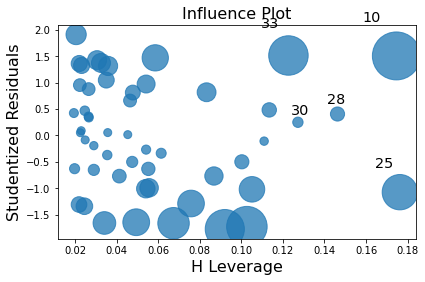

In [59]:
fig = sm.graphics.influence_plot(est2, criterion="cooks")
fig.tight_layout(pad=1.0)

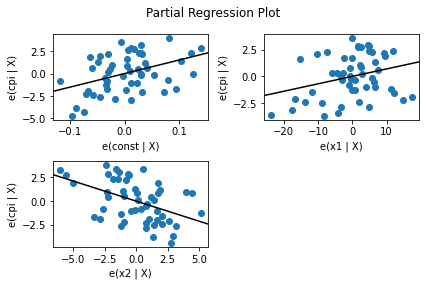

In [60]:
fig = sm.graphics.plot_partregress_grid(est2)
fig.tight_layout(pad=1.0)

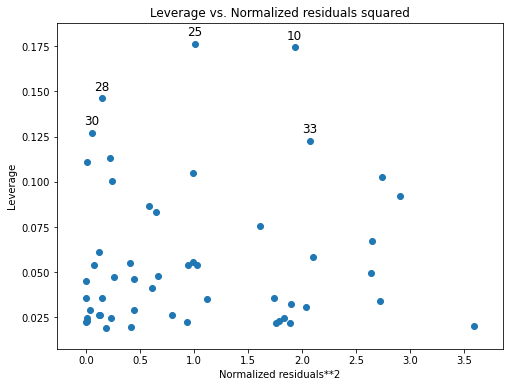

In [61]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(est2, ax = ax)

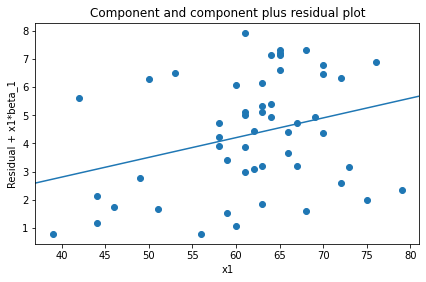

In [64]:
fig = sm.graphics.plot_ccpr(est2, "x1")
fig.tight_layout(pad=1.0)

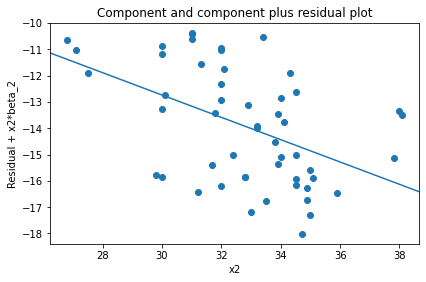

In [65]:
fig = sm.graphics.plot_ccpr(est2, "x2")
fig.tight_layout(pad=1.0)

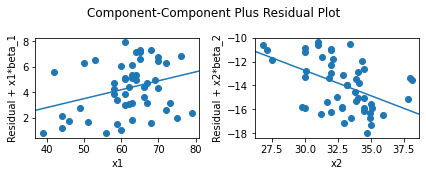

In [66]:
fig = sm.graphics.plot_ccpr_grid(est2)
fig.tight_layout(pad=1.0)

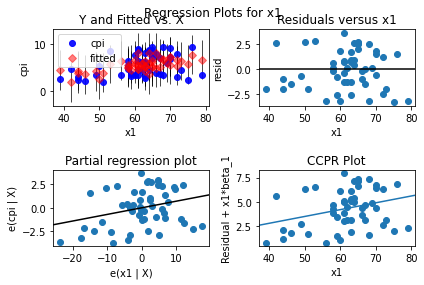

In [69]:
fig = sm.graphics.plot_regress_exog(est2, "x1")

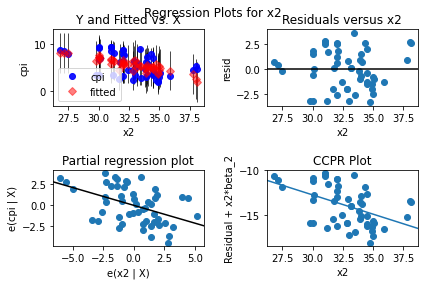

In [70]:
fig = sm.graphics.plot_regress_exog(est2, "x2")

In [62]:
#Breush-Pagan test:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.stats.diagnostic.het_breuschpagan(est2.resid, est2.model.exog)
sms.compat.python.lzip(name, test)

[('Lagrange multiplier statistic', 0.42211224713846907),
 ('p-value', 0.809728620745681),
 ('f-value', 0.2005074365287228),
 ('f p-value', 0.818983442877309)]

In this example, the Lagrange multiplier statistic for the test is 0.4221 and the corresponding p-value is 0.8097. Because this p-value is not less than 0.05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that heteroscedasticity is present in the regression model. We conclude that heteroscedasticity exists.

In [78]:
est2.scale

3.927096887870459

In [81]:
est2.resid

0    -2.443955
1     2.642853
2     1.282452
3     0.026094
4    -0.733305
5     3.647346
6     1.571614
7    -0.657335
8    -3.183367
9     0.663153
10    2.673591
11    1.553190
12   -2.606897
13   -0.526509
14   -0.207637
15   -3.126009
16    2.788872
17   -3.130715
18   -2.550301
19    1.715731
20    0.919511
21   -0.981202
22    2.649224
23   -0.949538
24   -1.247235
25   -1.933256
26   -1.947973
27   -1.231427
28    0.745442
29    2.748272
30    0.462651
31    0.172590
32   -3.281464
33    2.770738
34    0.102040
35   -1.505970
36   -1.465108
37   -0.172692
38   -1.285670
39    2.538122
40    0.905132
41    0.098046
42    1.873491
43    2.572802
44    0.704417
45   -3.176972
46   -0.385670
47   -1.916522
48    0.835080
49    1.865506
50    2.034130
51   -1.915358
dtype: float64

Equation for the model would be: <br>
${cpi}_{i} = {15.1589}+{0.0701}*{age}+{-0.4245}*{hours}+{u}_{i}$

Age and hours have different kinds of correlations, and explains CPI differently. An increment of one Year in billionaires age, increment in 0.0701 CPI. An increment of one worked hour reduces CPI in 0.4245.

<h1>Exercise 3

In [86]:
#Importing dataset to solve exercise 3
### This dataset has corruption data for 52 contries
###### CPI - Corruption Perception Index
###### 'Idade' or Age - Mean age for the country billionaires 
###### 'Horas' or Hours - Work hours, on average. Total Hours worked in a Yer/ 52 weeks
###### 'Emergente' or Emergent - If the country is a Developed or Emergent country
dframe_ex3 = pd.read_excel('Regression_exercises_datasets.xlsx', sheet_name='Planilha3')

In [87]:
dframe_ex3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pais       52 non-null     object 
 1   cpi        52 non-null     float64
 2   idade      52 non-null     int64  
 3   horas      52 non-null     float64
 4   emergente  52 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 2.2+ KB


In [102]:
#Let's transform 'emergente' column into two dummy columns
dframe_ex3_with_dummies = pd.concat([dframe_ex3, pd.get_dummies(dframe_ex3['emergente'])], axis=1)

In [103]:
dframe_ex3_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pais          52 non-null     object 
 1   cpi           52 non-null     float64
 2   idade         52 non-null     int64  
 3   horas         52 non-null     float64
 4   emergente     52 non-null     object 
 5   Desenvolvido  52 non-null     uint8  
 6   Emergente     52 non-null     uint8  
dtypes: float64(2), int64(1), object(2), uint8(2)
memory usage: 2.3+ KB


In [104]:
dframe_ex3_with_dummies = dframe_ex3_with_dummies.drop(columns=['emergente'])
dframe_ex3_with_dummies.columns = ['country','cpi','age','hours','is_developed','is_emergent']

In [105]:
dframe_ex3_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       52 non-null     object 
 1   cpi           52 non-null     float64
 2   age           52 non-null     int64  
 3   hours         52 non-null     float64
 4   is_developed  52 non-null     uint8  
 5   is_emergent   52 non-null     uint8  
dtypes: float64(2), int64(1), object(1), uint8(2)
memory usage: 1.9+ KB


In [128]:
dframe_ex3.groupby(['emergente'], as_index=False)['cpi'].mean()

,emergente,cpi
0,Desenvolvido,7.728571
1,Emergente,4.096774


In [127]:
diff_avg_cpi = round(dframe_ex3.groupby(['emergente'], as_index=False)['cpi'].mean().to_dict()['cpi'][0]-dframe_ex3.groupby(['emergente'], as_index=False)['cpi'].mean().to_dict()['cpi'][1],4)
print(diff_avg_cpi)

3.6318


Yes, there is a difference in avg_cpi between developed and emergent countries!

${AvgCPI}_{dev}-{AvgCPI}_{emer} = 3.6318$

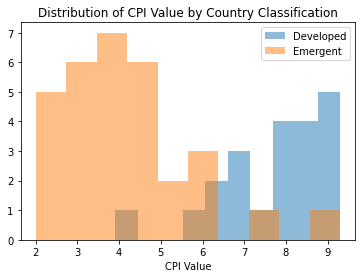

In [110]:
#Creating histogram between dev and emerg countries
plt.hist('cpi', data=dframe_ex3[dframe_ex3['emergente'] == 'Desenvolvido'], alpha=0.5, label='Developed');
plt.hist('cpi', data=dframe_ex3[dframe_ex3['emergente'] == 'Emergente'], alpha=0.5, label='Emergent');
plt.title('Distribution of CPI Value by Country Classification');
plt.xlabel('CPI Value');
plt.legend();

Histogram double checked for us: Dev countries have higher CPI, while Emergent lower.

In [137]:
from scipy.stats import ttest_ind
import numpy as np

dev = np.array(dframe_ex3[dframe_ex3['emergente'] == 'Desenvolvido']['cpi'])
emer = np.array(dframe_ex3[dframe_ex3['emergente'] == 'Emergente']['cpi'])

avg_cpi_dev = dframe_ex3.groupby(['emergente'], as_index=False)['cpi'].mean().to_dict()['cpi'][0]
avg_cpi_emer = dframe_ex3.groupby(['emergente'], as_index=False)['cpi'].mean().to_dict()['cpi'][1]

std_cpi_dev = np.std(np.array(dframe_ex3[dframe_ex3['emergente'] == 'Desenvolvido']['cpi']))
std_cpi_emer = np.std(np.array(dframe_ex3[dframe_ex3['emergente'] == 'Emergente']['cpi']))

ttest,pval = ttest_ind(dev,emer)
print("p-value",pval)

if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

p-value 3.976805313440272e-11
we reject null hypothesis


We can conclude that the difference between the population means is statistically significant!

In [142]:
###Let's start the stepwise regression
##### getting column names
x_columns = ["age", "hours", "is_emergent"]
y = dframe_ex3_with_dummies["cpi"]

In [139]:
dframe_ex3_with_dummies.columns

Index(['country', 'cpi', 'age', 'hours', 'is_developed', 'is_emergent'], dtype='object')

In [146]:
## creating function to get model statistics
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = dframe_ex3_with_dummies[x_columns]
    X2 = sm.add_constant(x)
    results = sm.OLS(y, X2).fit()
    print(results.summary())
get_stats()

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     26.45
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           3.04e-10
Time:                        01:41:40   Log-Likelihood:                -92.379
No. Observations:                  52   AIC:                             192.8
Df Residuals:                      48   BIC:                             200.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.6819      3.642      2.933      

In [151]:
def model_1(emer,age,hours):
    return (10.6819 + 0.0319*age + (-0.1604*hours) + (-3.0742*emer))

In [156]:
####In a scenario as below, the model would result in...
print("The CPI for an emergent country, with billionaires avg age in 51 years and a avg working hours of 37 would be: {}".format(model_1(1,51,37)))

The CPI for an emergent country, with billionaires avg age in 51 years and a avg working hours of 37 would be: 3.2998000000000007


In [158]:
####Let's add ln for the hours variable inside de df
dframe_ex3_with_dummies['ln_hours'] = np.log(dframe_ex3_with_dummies['hours'])

In [169]:
###Now let's plot another model, considering ln_hours not only hours
X = np.column_stack((dframe_ex3_with_dummies['age'], dframe_ex3_with_dummies['ln_hours'], dframe_ex3_with_dummies['is_emergent']))
y = dframe_ex3_with_dummies['cpi']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cpi   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     26.60
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           2.79e-10
Time:                        02:03:30   Log-Likelihood:                -92.288
No. Observations:                  52   AIC:                             192.6
Df Residuals:                      48   BIC:                             200.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.9884     11.097      2.162      0.0

In [163]:
def model_2(emer,age,hours):
    return (23.9884 + 0.0323*age + (-5.3319*np.log(hours)) + (-3.0591*emer))

In [167]:
print("The CPI for an emergent country, with billionaires avg age in 51 years and a avg working hours of 37, considering model 1, would be: {}".format(model_1(1,51,37)))
print("The CPI for an emergent country, with billionaires avg age in 51 years and a avg working hours of 37, considering model 2, would be: {}".format(model_2(1,51,37)))

The CPI for an emergent country, with billionaires avg age in 51 years and a avg working hours of 37, considering model 1, would be: 3.2998000000000007
The CPI for an emergent country, with billionaires avg age in 51 years and a avg working hours of 37, considering model 2, would be: 3.323546781572259


I would choose model 2 as it's ${R}^2$ is higher.